<a href="https://colab.research.google.com/github/zyberg2091/Knowledge-Tracing/blob/master/Knowledge_Tracing_(Time_series_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir('/root')

['.bashrc',
 '.profile',
 '.config',
 '.keras',
 '.local',
 '.tmux.conf',
 '.jupyter',
 '.cache',
 '.ipython',
 '.npm',
 '.gsutil']

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c riiid-test-answer-prediction

  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 116kB/s]
  0% 0.00/445k [00:00<?, ?B/s]
100% 445k/445k [00:00<00:00, 60.9MB/s]
  0% 0.00/289k [00:00<?, ?B/s]
100% 289k/289k [00:00<00:00, 89.9MB/s]
  0% 0.00/5.99k [00:00<?, ?B/s]
100% 5.99k/5.99k [00:00<00:00, 12.0MB/s]
  0% 0.00/971 [00:00<?, ?B/s]
100% 971/971 [00:00<00:00, 677kB/s]
 99% 1.28G/1.29G [00:14<00:00, 96.9MB/s]
100% 1.29G/1.29G [00:14<00:00, 93.2MB/s]
  0% 0.00/9.48k [00:00<?, ?B/s]
100% 9.48k/9.48k [00:00<00:00, 9.72MB/s]


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("train.csv",nrows=100000)

In [ ]:
df.to_csv('train_file.csv')

In [ ]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [ ]:
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,100000.000000,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,97834.000000
mean,49999.500000,7.332661e+09,1.090868e+06,5156.21962,0.018180,974.593070,1.382490,0.655080,24715.389854
std,28867.657797,1.031230e+10,6.657180e+05,3896.63440,0.133603,1205.095836,1.193602,0.512165,17379.027689
min,0.000000,0.000000e+00,1.150000e+02,0.00000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,24999.750000,6.595929e+08,4.590170e+05,1797.00000,0.000000,124.000000,0.000000,0.000000,16000.000000
50%,49999.500000,4.015927e+09,1.282581e+06,4980.00000,0.000000,458.000000,1.000000,1.000000,21000.000000
75%,74999.250000,1.000065e+10,1.567938e+06,7427.00000,0.000000,1358.000000,3.000000,1.000000,28666.000000
max,99999.000000,5.949531e+10,2.078569e+06,32736.00000,1.000000,5630.000000,3.000000,1.000000,300000.000000


In [ ]:
df.drop(columns=['row_id'],inplace=True)

In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


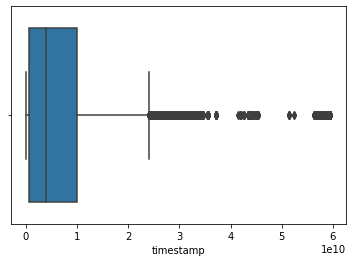

In [ ]:
import seaborn as sns

sns.boxplot(df['timestamp'])

 Too many outliers so am not ignoring outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       100000 non-null  int64  
 1   user_id                         100000 non-null  int64  
 2   content_id                      100000 non-null  int64  
 3   content_type_id                 100000 non-null  int64  
 4   task_container_id               100000 non-null  int64  
 5   user_answer                     100000 non-null  int64  
 6   answered_correctly              100000 non-null  int64  
 7   prior_question_elapsed_time     97834 non-null   float64
 8   prior_question_had_explanation  99652 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 6.9+ MB


In [ ]:
df['user_answer'].unique()

array([ 3,  2,  0,  1, -1])

In [ ]:
df['answered_correctly'].unique()

array([ 1,  0, -1])

In [ ]:
len(df['user_id'].unique())

349

In [ ]:
df=df.rename(columns={'task_container_id' : 'question_bundle_id'})

In [ ]:
len(df['question_bundle_id'].unique())

5631

In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


# **Common Features:**

timestamp - It is the time at which user completes the task in          that particular interaction id. 

user_answer - user's answer to ques 0,1,2,3 and -1 for lectures going on.

answered_correctly - corrrectly answered for question provided, -1 for lectures


# **Identification Features:**

user_id - specific user id token

user_interaction_id - specific user_interaction_id token , -1 for lecture

question_bundle_id - specific token for batch of questions provided to user




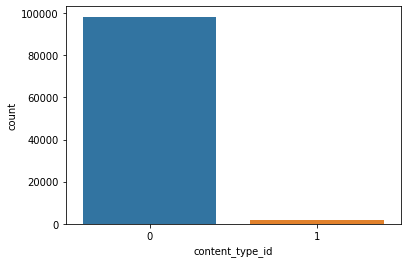

In [ ]:
#user interactions
sns.countplot(x=df['content_type_id'],data=df)   

Now lets try to see first three users 

In [ ]:
grp=df.groupby(['user_id'])

In [ ]:
df['user_id'].unique()[:3]

array([ 115,  124, 2746])

In [ ]:
a,b,c=grp.get_group(115).reset_index(),grp.get_group(124).reset_index(),grp.get_group(2746).reset_index()

In [ ]:
vis=pd.concat([a,b,c],ignore_index=True)

In [ ]:
vis.head()

,index,timestamp,user_id,content_id,content_type_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


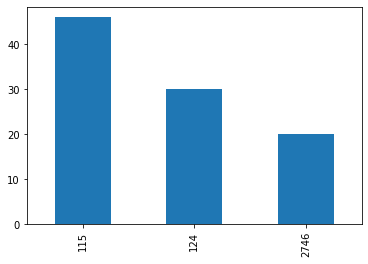

In [ ]:
vis['user_id'].value_counts().plot(kind='bar')  # interactions of specific users

In [ ]:
#Analyzing user's answer to all the question label 
alpha=vis['user_answer'][vis['user_id']==115].value_counts()

In [ ]:
alpha

3    13
2    11
1    11
0    11
Name: user_answer, dtype: int64

In [ ]:
#for user 115,124,2746 let's compare

v=pd.DataFrame({115 : vis['user_answer'][vis['user_id']==115].value_counts() ,
                124 : vis['user_answer'][vis['user_id']==124].value_counts(),
               2746 : vis['user_answer'][vis['user_id']==2746].value_counts()} , index=[-1,0,1,2,3])


In [ ]:
v.fillna(0)

,115,124,2746
-1,0.0,0.0,1.0
0,11.0,7.0,7.0
1,11.0,6.0,2.0
2,11.0,8.0,0.0
3,13.0,9.0,10.0


In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'count')

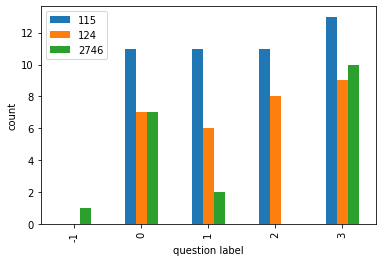

In [ ]:
v.plot(kind='bar')    # users answers on different options ignore -1,its for lecture

plt.xlabel('question label')
plt.ylabel('count')

User 115 attempted most no. of questions among the three


Text(0.5, 0, 'user_115')

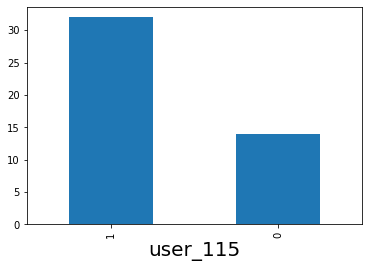

In [ ]:
import matplotlib.pyplot as plt

# users 115,124,2746 answers evaluation

vis['answered_correctly'][vis['user_id']==115].value_counts().plot(kind='bar')
plt.xlabel('user_115',fontsize=20)



Text(0.5, 0, 'user_124')

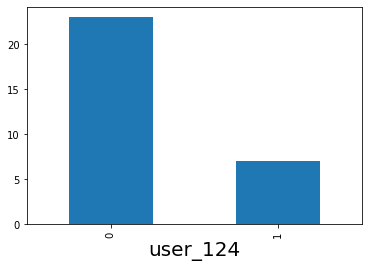

In [ ]:
vis['answered_correctly'][vis['user_id']==124].value_counts().plot(kind='bar')
plt.xlabel('user_124',fontsize=20)

Text(0.5, 0, 'user_2746')

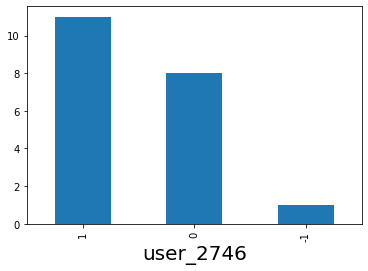

In [ ]:
vis['answered_correctly'][vis['user_id']==2746].value_counts().plot(kind='bar')
plt.xlabel('user_2746',fontsize=20)

In [ ]:
#Now we have a idea of data distribution a little bit we move on again to large dataset for EDA

# Task 1 
# Remove the info about lectures from dataset



In [ ]:
df.columns

Index(['timestamp', 'user_id', 'content_id', 'content_type_id',
       'question_bundle_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')

In [ ]:
print(f'We have {df.content_id.nunique()} content ids in our train set, of which {df[df.content_type_id == 0].content_id.nunique()} are questions.')

We have 11532 content ids in our train set, of which 11321 are questions.


In [ ]:
df=df[df['content_type_id']==0]           # 1 is for lectures so we remove it


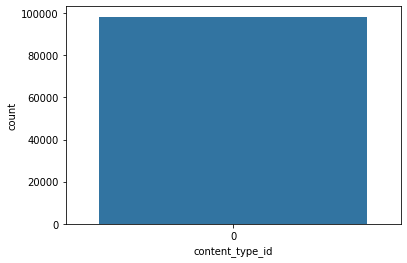

In [ ]:
sns.countplot(x=df['content_type_id'],data=df)   

In [ ]:
df.head(50)

,timestamp,user_id,content_id,content_type_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
5,157063,115,156,0,5,2,1,5000.0,False
6,176092,115,51,0,6,0,1,17000.0,False
7,194190,115,50,0,7,3,1,17000.0,False
8,212463,115,7896,0,8,2,1,16000.0,False
9,230983,115,7863,0,9,0,1,16000.0,False


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


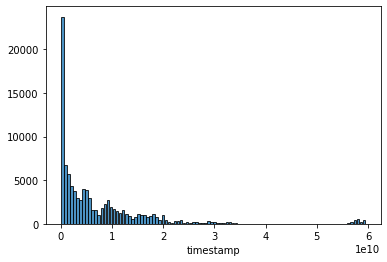

In [ ]:
# Timestamp distribution

sns.distplot(df['timestamp'],kde=False,
             hist_kws={'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8}, bins=100)



Timestamp data distribution says that until what duration of time most of the users have used the software.

In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [ ]:
np.sort(df['user_id'].unique())[:5]==df['user_id'].unique()[:5]


array([ True,  True,  True,  True,  True])

user_id seems to be sorted

In [ ]:
# let's check the relationship btw timestamp and question_bundle_id

Text(0, 0.5, 'timestamp')

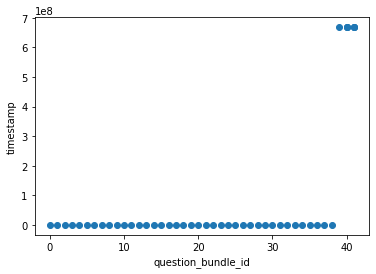

In [ ]:
# for 115 user_id
plt.scatter(x=df['question_bundle_id'][df['user_id']==115],
            y=df['timestamp'][df['user_id']==115])

plt.xlabel('question_bundle_id')
plt.ylabel('timestamp')

In [ ]:
print(pd.__version__)

1.1.5


Text(0, 0.5, 'timestamp')

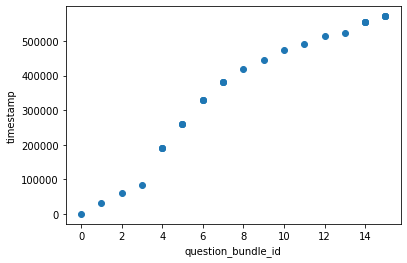

In [ ]:
#for user 124
plt.scatter(x=df['question_bundle_id'][df['user_id']==124],
            y=df['timestamp'][df['user_id']==124])

plt.xlabel('question_bundle_id')
plt.ylabel('timestamp')

Text(0, 0.5, 'timestamp')

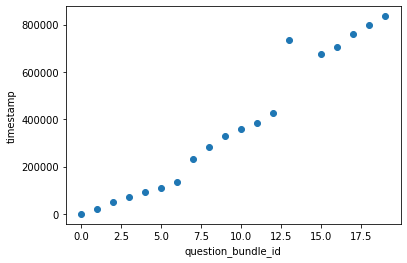

In [ ]:
#for user 2746
plt.scatter(x=df['question_bundle_id'][df['user_id']==2746],
            y=df['timestamp'][df['user_id']==2746])

plt.xlabel('question_bundle_id')
plt.ylabel('timestamp')

From visualizations it seems it increases monotically (but hey its not true)


In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


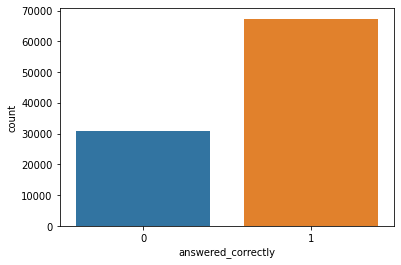

In [ ]:
sns.countplot(df['answered_correctly'])  #ingeneral

Overall nice performance


In [ ]:
len(df['question_bundle_id'].unique())

5631

In [ ]:
print(f'We have {len(df.question_bundle_id.unique())} unique Batches of questions or lectures.')

We have 5631 unique Batches of questions or lectures.


In [ ]:
df['answered_correctly'].unique() #Reminder : we have no lectures

array([1, 0])

In [ ]:
df['user_answer'].unique()

array([3, 2, 0, 1])

In [ ]:
len(df[(df['user_answer']==3) & (df['answered_correctly']==1)])

17839

In [ ]:
#lets find out the frequency of each answer label (0,1,2,3)

normal_dict= { 3 : [ len(df[(df['user_answer']==3) & (df['answered_correctly']==1)]) , len(df[(df['user_answer']==3) & (df['answered_correctly']==0)])] , 
               0 : [ len(df[(df['user_answer']==0) & (df['answered_correctly']==1)]) , len(df[(df['user_answer']==0) & (df['answered_correctly']==0)])] ,
               1 : [ len(df[(df['user_answer']==1) & (df['answered_correctly']==1)]) , len(df[(df['user_answer']==1) & (df['answered_correctly']==0)])] ,
               2 : [ len(df[(df['user_answer']==2) & (df['answered_correctly']==1)]) , len(df[(df['user_answer']==2) & (df['answered_correctly']==0)])] }




In [ ]:
normal_dict

{0: [19112, 8813], 1: [17919, 8573], 2: [12456, 5264], 3: [17839, 8206]}

In [ ]:
len(normal_dict)

4

Text(0, 0.5, 'count')

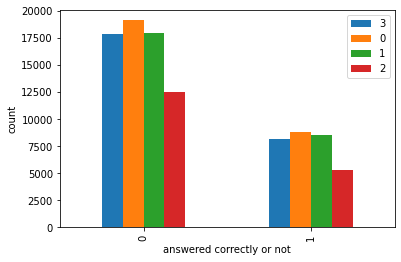

In [ ]:
# questions from different bundle id 
pd.DataFrame(normal_dict,index=[0,1]).plot(kind='bar')
plt.xlabel('answered correctly or not')
plt.ylabel('count')

User answer. Seems that the questions are multiple choice (answers 0-3). As mentioned in the data description, -1 is actually no-answer (as the interaction was a lecture instead of a question) and this information has been removed.

inderence : Option 3 is frequently wrong and the right answer in the among different question_bundles

Remember question bundle may contain more than one question but id is same.


In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [ ]:
len(df['content_id'].unique())

11321

In [ ]:
len(df)

98182

In [ ]:
#let's see the last two columns now:

df=df.drop(columns=['content_type_id'])

In [ ]:
df.head()

,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,1,3,1,NaN,NaN
1,56943,115,5716,2,2,1,37000.0,False
2,118363,115,128,0,0,1,55000.0,False
3,131167,115,7860,3,0,1,19000.0,False
4,137965,115,7922,4,1,1,11000.0,False


In [ ]:
new_df=df[df['timestamp']!=0]

In [ ]:
new_df.head()

,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,56943,115,5716,2,2,1,37000.0,False
2,118363,115,128,0,0,1,55000.0,False
3,131167,115,7860,3,0,1,19000.0,False
4,137965,115,7922,4,1,1,11000.0,False
5,157063,115,156,5,2,1,5000.0,False


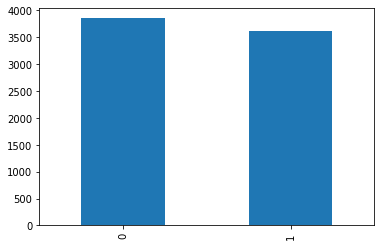

In [ ]:
per=new_df['answered_correctly'][new_df['prior_question_had_explanation']==False].value_counts()
# plt.bar(x=list(per.index),y=list(per.values),align='edge')
per.plot.bar()

In [ ]:
per.values

array([3854, 3627])

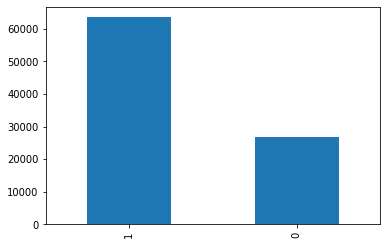

In [ ]:
new_df['answered_correctly'][new_df['prior_question_had_explanation']==True].value_counts().plot.bar()

better performance if the student sees the prior explanation for the previous question he/she answers.This concludes that he/she gets better understanding after comparing the original answer to his/her answer.

In [ ]:
new_df.head()

,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,56943,115,5716,2,2,1,37000.0,False
2,118363,115,128,0,0,1,55000.0,False
3,131167,115,7860,3,0,1,19000.0,False
4,137965,115,7922,4,1,1,11000.0,False
5,157063,115,156,5,2,1,5000.0,False


In [ ]:
new_df.describe()['prior_question_elapsed_time']

count     97830.000000
mean      24714.468476
std       17378.785596
min           0.000000
25%       16000.000000
50%       21000.000000
75%       28666.000000
max      300000.000000
Name: prior_question_elapsed_time, dtype: float64

In [ ]:
new_df[new_df['answered_correctly']==1].groupby('answered_correctly').mean()['prior_question_elapsed_time']

answered_correctly
1    24649.246192
Name: prior_question_elapsed_time, dtype: float64

when user is correct its taking less time time to solve them

In [ ]:
#At last lets see the correlation of features by drawing confusion matrix of general dataframe

corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')


,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,0.104742,0.096884,0.556215,-0.000723,0.078500,-0.077948
user_id,0.104742,1.000000,-0.047769,0.017558,-0.007236,0.002699,0.015599
content_id,0.096884,-0.047769,1.000000,0.046268,0.013996,-0.015363,0.150349
question_bundle_id,0.556215,0.017558,0.046268,1.000000,0.001851,0.106672,-0.052120
user_answer,-0.000723,-0.007236,0.013996,0.001851,1.000000,0.005684,0.011867
answered_correctly,0.078500,0.002699,-0.015363,0.106672,0.005684,1.000000,-0.005566
prior_question_elapsed_time,-0.077948,0.015599,0.150349,-0.052120,0.011867,-0.005566,1.000000


In [ ]:
df.head()

,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,1,3,1,NaN,NaN
1,56943,115,5716,2,2,1,37000.0,False
2,118363,115,128,0,0,1,55000.0,False
3,131167,115,7860,3,0,1,19000.0,False
4,137965,115,7922,4,1,1,11000.0,False


Analysis done to understand and visualize different features inside the data:
Data : 100k rows only taken due for faster optimization of computation.

Now lets draw the inference for each column:

- Timestamp : Its given in sorted order for every user id.Its basically gives the user_interaction on the platform service.

- User_id : Now there are 349 different users on this platform each one of them is identified by unique user_name.

- Content_id : it is the (questions+lectures) available on the platform.

- Question_id_bundle : It contains the set of questions max=3q and each set is identified by unique id.

- User_answer : Its seems like the option chosen for different question in a mcq type quest option available: 0,1,2,3 and -1 for lectures

- Answered_correctly (Target_Variable) : 



In [ ]:
df.head()

,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,1,3,1,NaN,NaN
1,56943,115,5716,2,2,1,37000.0,False
2,118363,115,128,0,0,1,55000.0,False
3,131167,115,7860,3,0,1,19000.0,False
4,137965,115,7922,4,1,1,11000.0,False


In [ ]:
train_df=df.dropna()

In [ ]:
train_df.head()

,timestamp,user_id,content_id,question_bundle_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,56943,115,5716,2,2,1,37000.0,False
2,118363,115,128,0,0,1,55000.0,False
3,131167,115,7860,3,0,1,19000.0,False
4,137965,115,7922,4,1,1,11000.0,False
5,157063,115,156,5,2,1,5000.0,False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97834 entries, 1 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       97834 non-null  int64  
 1   user_id                         97834 non-null  int64  
 2   content_id                      97834 non-null  int64  
 3   question_bundle_id              97834 non-null  int64  
 4   user_answer                     97834 non-null  int64  
 5   answered_correctly              97834 non-null  int64  
 6   prior_question_elapsed_time     97834 non-null  float64
 7   prior_question_had_explanation  97834 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 6.7+ MB


In [ ]:
train_df=train_df[['user_id','prior_question_elapsed_time','answered_correctly']]

In [ ]:
# train_df['answered_correctly'][train_df['user_id']==115].mean()

In [ ]:
new_train_df=train_df.copy()

In [ ]:
new_train_df=new_train_df[:len(train_df['user_id'].unique())]

In [ ]:
new_train_df['user_id']=train_df['user_id'].unique()

In [ ]:
len(new_train_df['user_id'].unique())

348

In [ ]:
new_train_df.head()

,user_id,prior_question_elapsed_time,answered_correctly
1,115,37000.0,1
2,124,55000.0,1
3,2746,19000.0,1
4,5382,11000.0,1
5,8623,5000.0,1


In [ ]:
new_train_df.iloc[1,0]

124

In [ ]:
l=0
for i in train_df['user_id'].unique():
    new_train_df.iloc[l,2]=train_df['answered_correctly'][train_df['user_id']==i].mean()
    new_train_df.iloc[l,1]=train_df['prior_question_elapsed_time'][train_df['user_id']==i].mean()
    l+=1


In [ ]:
new_train_df

,user_id,prior_question_elapsed_time,answered_correctly
1,115,19933.311111,0.688889
2,124,18793.000000,0.206897
3,2746,18055.555556,0.611111
4,5382,36048.387097,0.669355
5,8623,26107.407407,0.638889
...,...,...,...
357,2058478,40187.500000,0.437500
358,2066347,23822.113402,0.525773
359,2067931,16642.857143,0.803571
360,2073472,20526.782278,0.658228


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_train_df.iloc[:,:2] ,new_train_df.iloc[:,2], test_size=0.2 , random_state=0)

In [ ]:
x_train,y_train=x_train.values,y_train.values

In [ ]:
y_train=np.array([1 if i>0.5 else 0 for i in y_train])

In [ ]:
x_test,y_test=x_test.values,y_test.values

In [ ]:
y_test=np.array([1 if i>0.5 else 0 for i in y_test])

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm_params = {
    'objective': 'binary',
    'metric': ['auc'],
}

In [ ]:
#Data Preparation

train_data=train_data = lgb.Dataset(
    data = x_train,
    label = y_train,
    categorical_feature = None,
)

val_data = lgb.Dataset(
    data = x_test,
    label = y_test,
    categorical_feature = None,
)


In [ ]:
categorical_feature_idxs = []
VERSION = 'V1E'
NUM_BOOST_ROUND = 5000
VERBOSE_EVAL = 10

In [ ]:
# Train with LGBM

def train():
    evals_result = {}
    model = lgb.train(
        params = lgbm_params,
        train_set = train_data,
        valid_sets = [val_data],
        num_boost_round = NUM_BOOST_ROUND,
        verbose_eval = VERBOSE_EVAL,
        evals_result = evals_result,
        early_stopping_rounds = 10,
        categorical_feature = categorical_feature_idxs,
    )

    # save model
    model.save_model(f'model_{VERSION}_{NUM_BOOST_ROUND}.lgb')
    
    return model, evals_result
    
model, evals_result = train()

Training until validation scores don't improve for 10 rounds.
[10]	valid_0's auc: 0.59672
[20]	valid_0's auc: 0.647183
[30]	valid_0's auc: 0.626156
Early stopping, best iteration is:
[21]	valid_0's auc: 0.651388
